## FNNNeurons: Fully Connected Neural Network - Investigate # Neurons

### Goal: Here, the investigation will between the prior five-layer network with eight neurons in each layer, to a varying amount. 

### 0. Imports

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy import stats

### 1. Read Data

In [2]:
mushroom_data = pd.read_csv('raw_data/mushroom_cleaned.csv')
mushroom_data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


### 2. Prepare Data

In [3]:
X = mushroom_data.drop(columns=['class'])
y = mushroom_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# convert to tensors
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

### 3. Create NN

#### 3.1: 8-32

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 16)
        self.fc3 = nn.Linear(16,32)
        self.fc4 = nn.Linear(32,16)
        self.fc5 = nn.Linear(16,8)
        self.output_layer = nn.Linear(8, 1)


    # feedforward function
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc5(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        return x

#### 4. Train Model

##### 4.1: 8-32

In [5]:
# variables needed
input_size = X_train.shape[1]

# initialize model
model = NeuralNetwork(input_size)

# loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), 0.001)

# training accuracy tracker
train_accuracy = {"epoch": [], "accuracy": []}

# number of training loops
epochs = 5000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X_train_tensor)


    y_train_tensor = y_train_tensor.view(-1, 1)
    loss = criterion(output, y_train_tensor)

    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            model.eval()

            outputs = model(X_train_tensor)
            probabilities = torch.sigmoid(outputs)

            predictions = (probabilities > 0.5).float()

            accuracy = (y_train_tensor.flatten() == predictions.flatten()).float().mean()

            train_accuracy["epoch"].append(epoch)
            train_accuracy["accuracy"].append(accuracy.item())
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()* 100:.2f}%')
        

model_train_acc = accuracy

Epoch [10/5000], Loss: 0.6995, Accuracy: 57.84%
Epoch [20/5000], Loss: 0.6785, Accuracy: 54.51%
Epoch [30/5000], Loss: 0.6666, Accuracy: 62.08%
Epoch [40/5000], Loss: 0.6637, Accuracy: 61.62%
Epoch [50/5000], Loss: 0.6618, Accuracy: 61.16%
Epoch [60/5000], Loss: 0.6602, Accuracy: 61.13%
Epoch [70/5000], Loss: 0.6587, Accuracy: 61.11%
Epoch [80/5000], Loss: 0.6572, Accuracy: 61.02%
Epoch [90/5000], Loss: 0.6558, Accuracy: 60.96%
Epoch [100/5000], Loss: 0.6543, Accuracy: 60.83%
Epoch [110/5000], Loss: 0.6529, Accuracy: 60.76%
Epoch [120/5000], Loss: 0.6515, Accuracy: 60.61%
Epoch [130/5000], Loss: 0.6500, Accuracy: 60.72%
Epoch [140/5000], Loss: 0.6487, Accuracy: 60.92%
Epoch [150/5000], Loss: 0.6476, Accuracy: 60.95%
Epoch [160/5000], Loss: 0.6464, Accuracy: 60.99%
Epoch [170/5000], Loss: 0.6451, Accuracy: 60.95%
Epoch [180/5000], Loss: 0.6423, Accuracy: 61.12%
Epoch [190/5000], Loss: 0.6406, Accuracy: 60.96%
Epoch [200/5000], Loss: 0.6376, Accuracy: 60.56%
Epoch [210/5000], Loss: 0.635

### 5. Evaluation

##### 5.1: 8-32

In [33]:
model = NeuralNetwork(input_size) # Instantiate the model with necessary arguments
model.load_state_dict(torch.load('/Users/sophiacolonello/Desktop/school/senior year/cs4980-weight-transformation-mechanisms/cs4980-weight-transformation-mechanisms/models/increasing_neurons.pth'))
model.eval()

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=8, bias=True)
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
)

In [29]:
model = torch.load('/Users/sophiacolonello/Desktop/school/senior year/cs4980-weight-transformation-mechanisms/cs4980-weight-transformation-mechanisms/models/increasing_neruons.pth')

In [34]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    
    probabilities = torch.sigmoid(outputs)

    predictions = (probabilities > 0.5).float()

    accuracy = (y_test_tensor.flatten() == predictions.flatten()).float().mean()

print(f"Accuracy: {accuracy.item()* 100:.2f}%")
model_test_acc = accuracy.item()*100

Accuracy: 78.41%


#### 6. Weight Investigation

##### 6.1: 8-32

In [35]:
# dictionary to hold names and weights associated with each layer
model_dict = {"name":[], "weights":[]}

for name, param in model.state_dict().items():
    model_dict["name"].append(name)
    model_dict["weights"].append(param.data.numpy())

#### 7. Visualization

##### 7.1: 8-32 Weights by Layer

Text(57.972222222222214, 0.5, 'Weight Value')

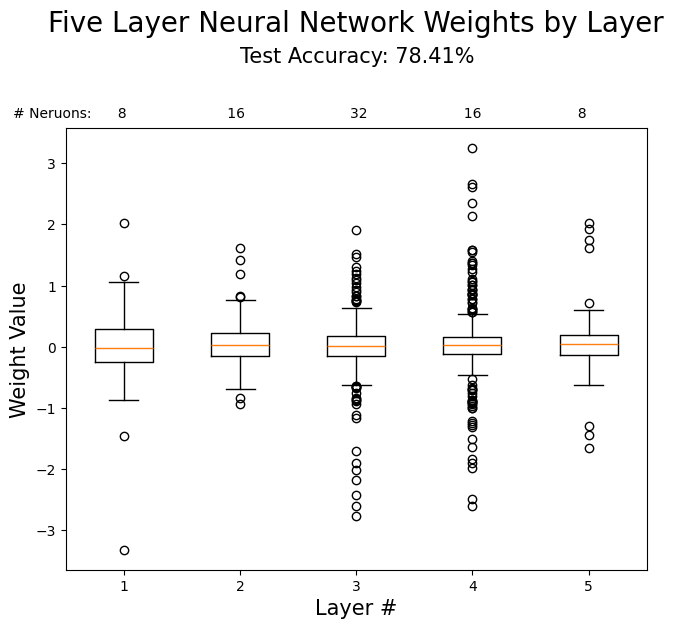

In [49]:
layer_boxplot_dict = {"boxes":[]}
for i in range(0,10,2):
    layer_boxplot_dict["boxes"].append(list(model_dict["weights"][i].flatten()))

plt.figure(figsize=(7.5,7.5))
plt.boxplot(layer_boxplot_dict['boxes'])
plt.title("Five Layer Neural Network Weights by Layer", y =1.2, fontsize = 20)
plt.tight_layout(pad =5)
plt.text(2, 4.65, f"Test Accuracy: {model_test_acc:.2f}%", fontsize = 15)
plt.text(0.05, 3.75, "# Neruons:      8                       16                        32                      16                      8")
plt.xlabel("Layer #", fontsize = 15)
plt.ylabel("Weight Value", fontsize = 15)

Text(0.5, 1.0, 'Logistic Q-Q Plot')

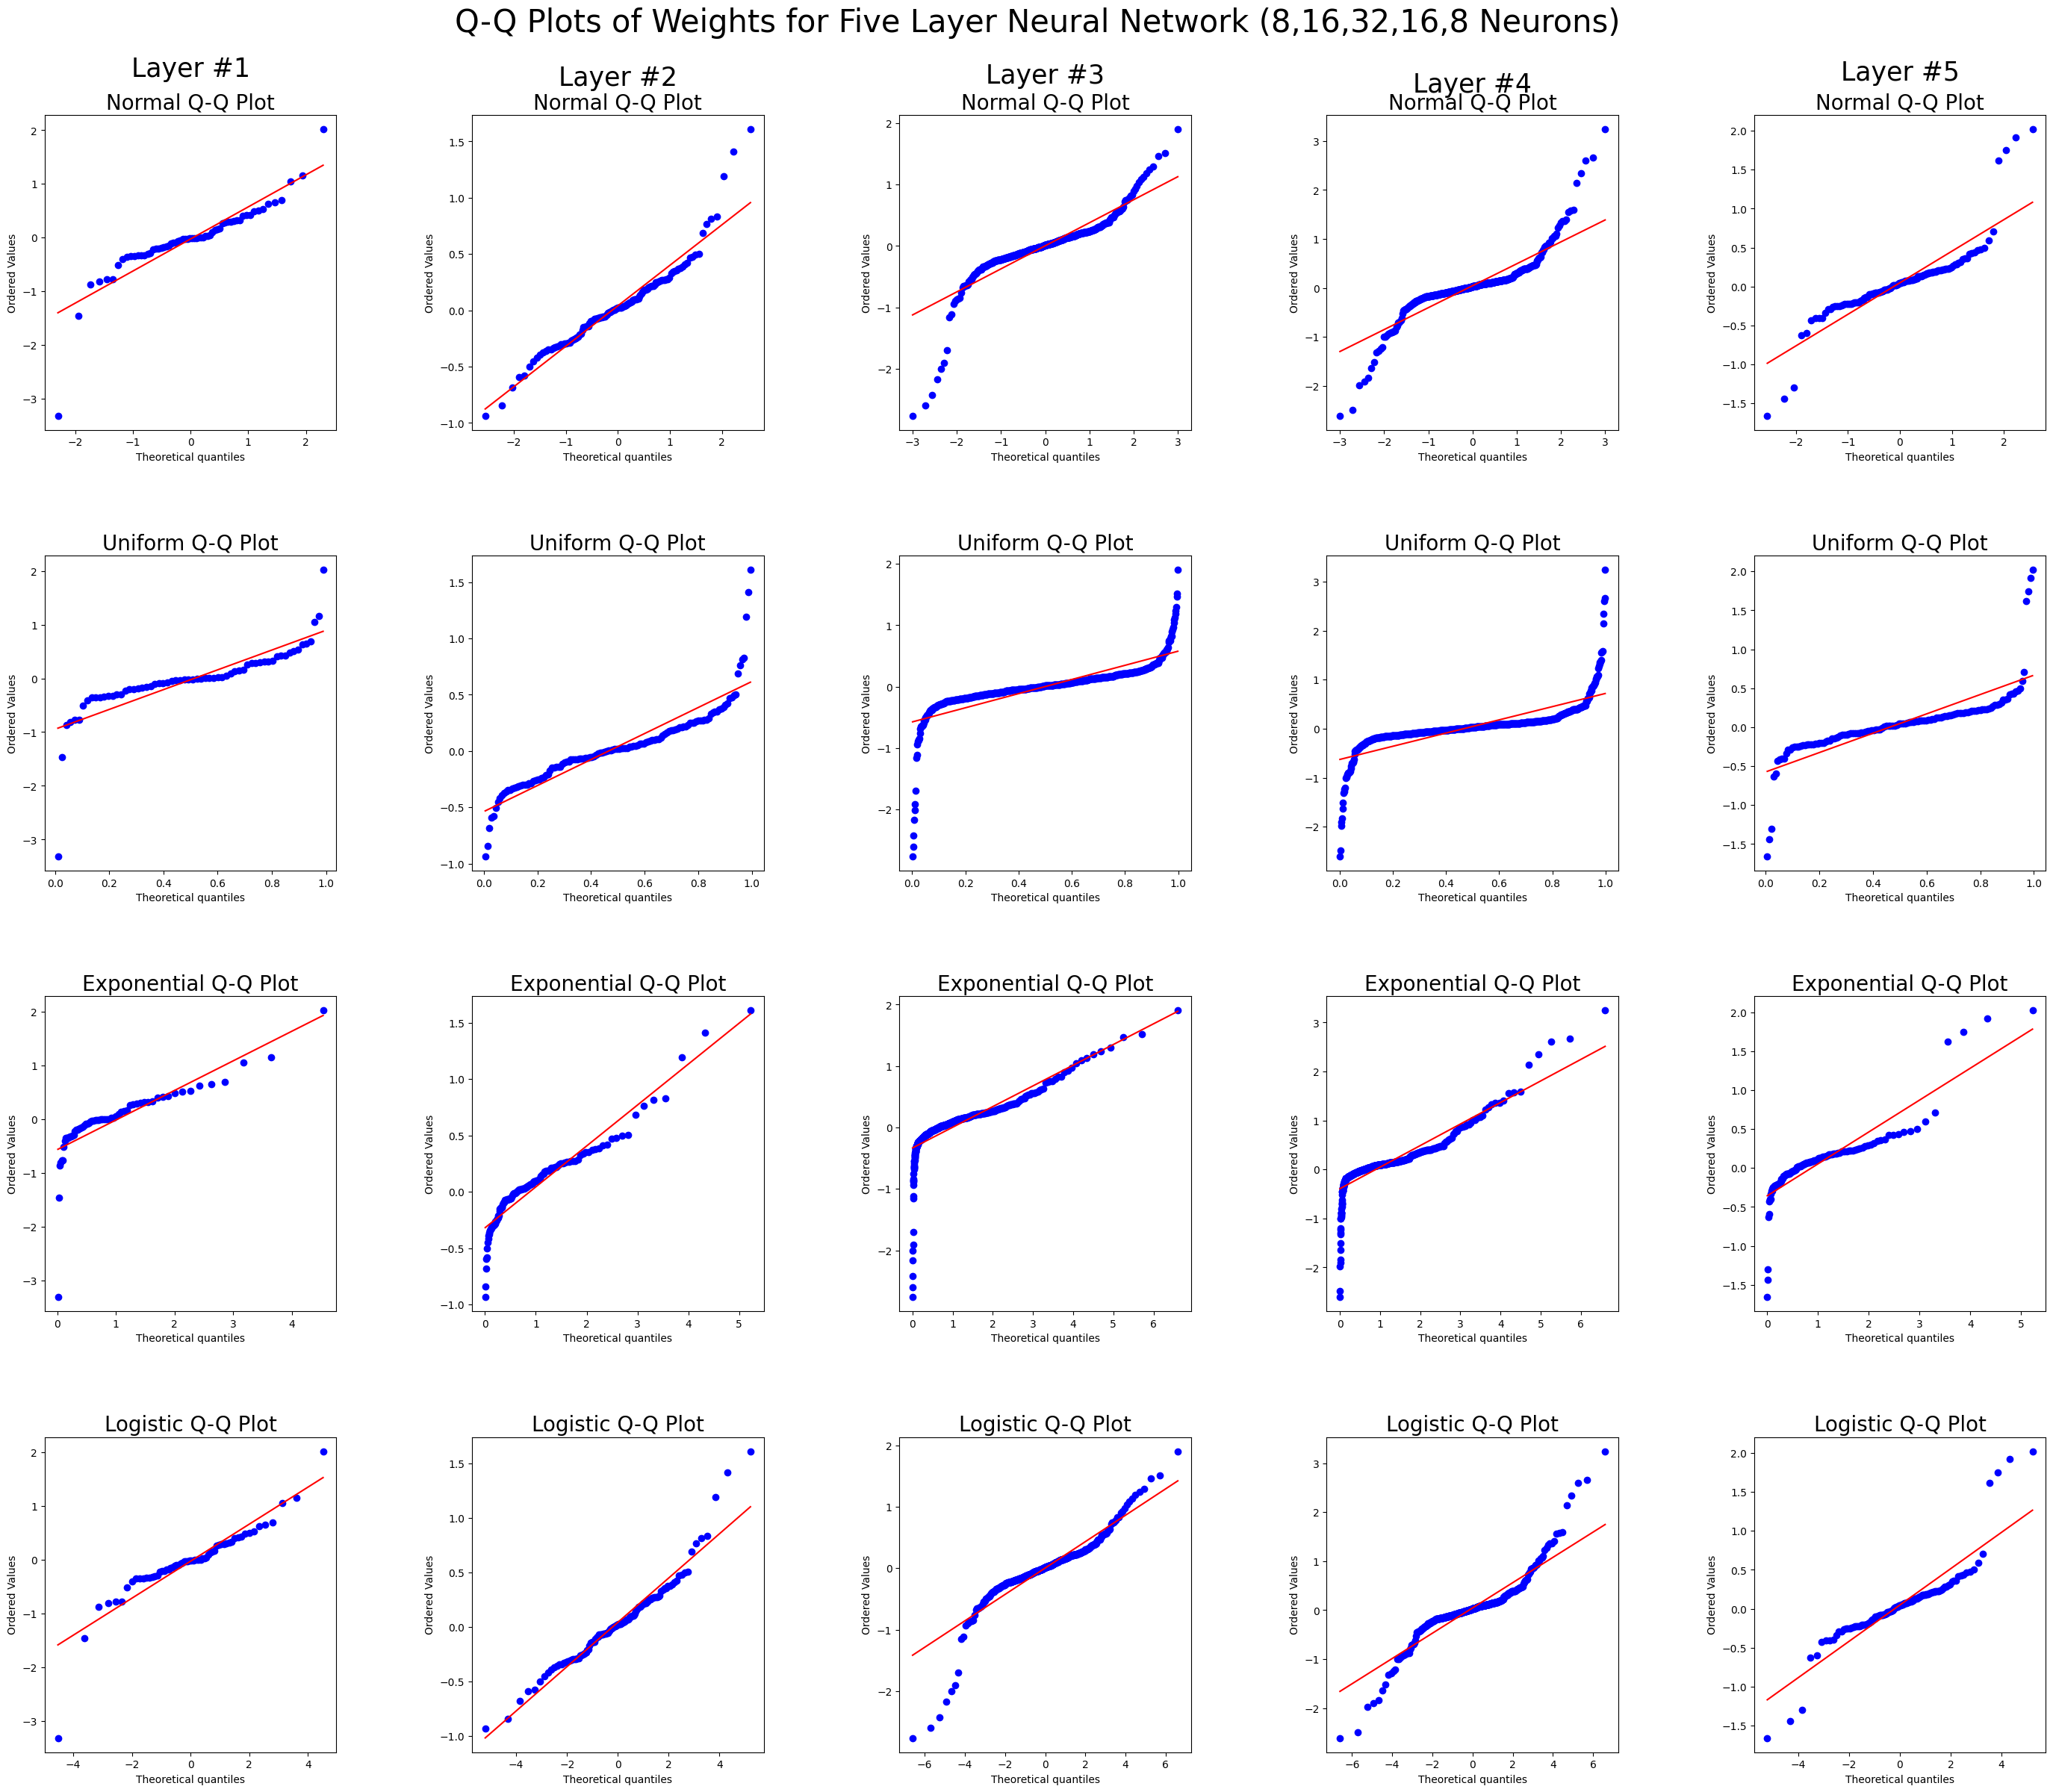

In [63]:
qq_points1 = model_dict['weights'][0].flatten()
nuerons1 = len(model_dict['weights'][0])
qq_points2 = model_dict['weights'][2].flatten()
nuerons2 = len(model_dict['weights'][2])
qq_points3 = model_dict['weights'][4].flatten()
nuerons3 = len(model_dict['weights'][4])
qq_points4 = model_dict['weights'][6].flatten()
nuerons4 = len(model_dict['weights'][6])
qq_points5 = model_dict['weights'][8].flatten()
nuerons5 = len(model_dict['weights'][8])

fig, axes = plt.subplots(4, 5, figsize=(30, 25))
fig.tight_layout(pad=10)

fig.suptitle("Q-Q Plots of Weights for Five Layer Neural Network (8,16,32,16,8 Neurons)", fontsize = 30, y = 1)

# layer 1
axes[0,0].text(0, 3, "Layer #1", fontsize = 25, ha = "center")
stats.probplot(qq_points1, dist = "norm", plot = axes[0,0])
axes[0,0].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "uniform", plot = axes[1,0])
axes[1,0].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "expon", plot = axes[2,0])
axes[2,0].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points1, dist = "logistic", plot = axes[3,0])
axes[3,0].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 2
axes[0,1].text(0, 2, "Layer #2", fontsize = 25, ha = "center")
stats.probplot(qq_points2, dist = "norm", plot = axes[0,1])
axes[0,1].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "uniform", plot = axes[1,1])
axes[1,1].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "expon", plot = axes[2,1])
axes[2,1].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points2, dist = "logistic", plot = axes[3,1])
axes[3,1].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 3
axes[0,2].text(0, 2.65, "Layer #3", fontsize = 25, ha = "center")
stats.probplot(qq_points3, dist = "norm", plot = axes[0,2])
axes[0,2].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "uniform", plot = axes[1,2])
axes[1,2].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "expon", plot = axes[2,2])
axes[2,2].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points3, dist = "logistic", plot = axes[3,2])
axes[3,2].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 4
axes[0,3].text(0, 4, "Layer #4", fontsize = 25, ha = "center")
stats.probplot(qq_points4, dist = "norm", plot = axes[0,3])
axes[0,3].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points4, dist = "uniform", plot = axes[1,3])
axes[1,3].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points4, dist = "expon", plot = axes[2,3])
axes[2,3].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points4, dist = "logistic", plot = axes[3,3])
axes[3,3].set_title("Logistic Q-Q Plot", fontsize = 20)

# layer 5
axes[0,4].text(0, 2.65, "Layer #5", fontsize = 25, ha = "center")
stats.probplot(qq_points5, dist = "norm", plot = axes[0,4])
axes[0,4].set_title("Normal Q-Q Plot", fontsize = 20)
stats.probplot(qq_points5, dist = "uniform", plot = axes[1,4])
axes[1,4].set_title("Uniform Q-Q Plot", fontsize = 20)
stats.probplot(qq_points5, dist = "expon", plot = axes[2,4])
axes[2,4].set_title("Exponential Q-Q Plot", fontsize = 20)
stats.probplot(qq_points5, dist = "logistic", plot = axes[3,4])
axes[3,4].set_title("Logistic Q-Q Plot", fontsize = 20)


# do one for power log
